Chapter 1: Probability - Exercises: 

21. Suppose a coin has probability p of falling heads up. If we flip the coin many times we would expect the proportion of heads to be near p. We will make this formal later. Take p=0.3 and n=1000 and simulate n flips. Plot the proportion of heads as a function of n. Repeat for p=0.03

AttributeError: module 'matplotlib.pyplot' has no attribute 'tight_lay'

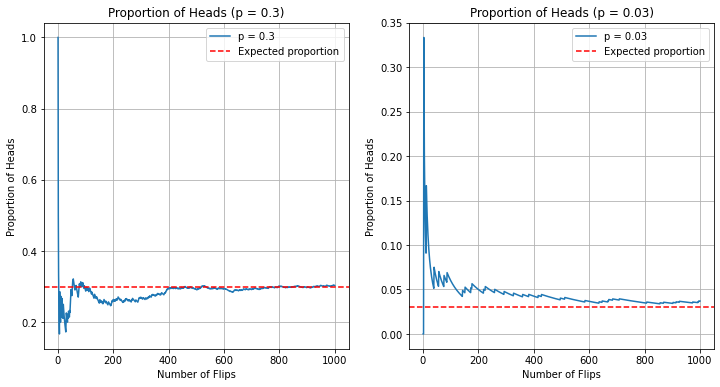

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate coin flips and calculate proportion of heads
def simulate_coin_flips(p, n):
    flips = np.random.choice([1, 0], size=n, p=[p, 1-p])  # 1 for heads, 0 for tails
    proportions = np.cumsum(flips) / np.arange(1, n + 1)  # Proportion of heads
    return proportions

n = 1000
p1 = 0.3
p2 = 0.03

proportions_p1 = simulate_coin_flips(p1, n)
proportions_p2 = simulate_coin_flips(p2, n)

plt.figure(figsize=(12, 6))

# Plot for p=0.3
plt.subplot(1, 2, 1)
plt.plot(range(1, n + 1), proportions_p1, label=f'p = {p1}')
plt.axhline(p1, color='red', linestyle='--', label='Expected proportion')
plt.title('Proportion of Heads (p = 0.3)')
plt.xlabel('Number of Flips')
plt.ylabel('Proportion of Heads')
plt.legend()
plt.grid(True)

# Plot for p=0.03
plt.subplot(1, 2, 2)
plt.plot(range(1, n + 1), proportions_p2, label=f'p = {p2}')
plt.axhline(p2, color='red', linestyle='--', label='Expected proportion')
plt.title('Proportion of Heads (p = 0.03)')
plt.xlabel('Number of Flips')
plt.ylabel('Proportion of Heads')
plt.legend()
plt.grid(True)

plt.tight_lay


22. Suppose we flip a coin n times and let p denote the probability of heads. Let X be the number of heads. We call X a binomial random variable, which is discussed in the next chapter. Intuition suggests that X will be closer to np. To see if this is true we can repeat this experiment many times and average the X values. Carry out a simulation and compare the average of the Xs to np. Try this for p=0.3 and n=10, n=100, n=1000.

In [2]:
import numpy as np

# binomial experiments
def simulate_binomial_experiment(p, n, repetitions):
    # Simulate repetitions of n coin flips and count heads (X)
    outcomes = np.random.binomial(n, p, repetitions)
    return outcomes.mean()  # Return the average number of heads

p = 0.3
repetitions = 10000  # Number of experiments
n_values = [10, 100, 1000]

# Simulations
results = []
for n in n_values:
    avg_X = simulate_binomial_experiment(p, n, repetitions)
    results.append((n, avg_X, n * p))

# Display results
print("Simulation Results:\n")
for n, avg_X, expected_np in results:
    print(f"n={n}: Average X = {avg_X:.2f}, Expected np = {expected_np:.2f}")


Simulation Results:

n=10: Average X = 2.98, Expected np = 3.00
n=100: Average X = 29.99, Expected np = 30.00
n=1000: Average X = 300.01, Expected np = 300.00


23. Here we will get some experience simulating conditional probabilities. Consider tossing a fair die. Let A={2,4,6} and B={1,2,3,4}. Thus P(A)=1/2, P(B)=2/3 and P(AB)=1/3. Since P(AB) =P(A)P(B), the events are independent. Simulate draws from the sample space and verify that P_hat(AB)=P_hat(A)P_hat(B) where P_hat(A) is the proportion of times A occurred in the simulation and similarly for P_hat(AB) and P_hat(B). Now find two events A and B that are not independent. Computer P_hat(A), P_hat(AB) and P_hat(B). Compare the calculated values to their theoretical values. Report your results and interpret.

In [3]:
import numpy as np

num_rolls = 100_000 

# Simulate rolls of a fair die
rolls = np.random.randint(1, 7, size=num_rolls)

# Define events
A = {2, 4, 6}  # Even numbers
B = {1, 2, 3, 4}  # Numbers in {1, 2, 3, 4}

# Calculate event occurrences
A_occurrences = np.isin(rolls, list(A))
B_occurrences = np.isin(rolls, list(B))
AB_occurrences = A_occurrences & B_occurrences

# Simulated probabilities
P_hat_A = np.mean(A_occurrences)
P_hat_B = np.mean(B_occurrences)
P_hat_AB = np.mean(AB_occurrences)

# Verify independence
independence_check = P_hat_AB - (P_hat_A * P_hat_B)

# Find two events that are not independent: A' and B'
A_prime = {1, 2}  # Subset of {1, 2, 3, 4}
B_prime = {2, 3}  # Overlapping subset of {1, 2, 3, 4}
A_prime_occurrences = np.isin(rolls, list(A_prime))
B_prime_occurrences = np.isin(rolls, list(B_prime))
AB_prime_occurrences = A_prime_occurrences & B_prime_occurrences

# Simulated probabilities for non-independent events
P_hat_A_prime = np.mean(A_prime_occurrences)
P_hat_B_prime = np.mean(B_prime_occurrences)
P_hat_AB_prime = np.mean(AB_prime_occurrences)

# Theoretical values for non-independent events
P_A_prime = len(A_prime) / 6
P_B_prime = len(B_prime) / 6
P_AB_prime = len(A_prime.intersection(B_prime)) / 6

# Results
print(f"Simulated P(A): {P_hat_A}")
print(f"Simulated P(B): {P_hat_B}")
print(f"Simulated P(A ∩ B): {P_hat_AB}")
print(f"Independence check (should be close to 0): {independence_check}")

print(f"\nSimulated for non-independent events:")
print(f"P(A') = {P_hat_A_prime}")
print(f"P(B') = {P_hat_B_prime}")
print(f"P(A' ∩ B') = {P_hat_AB_prime}")
print(f"Theoretical P(A') = {P_A_prime}")
print(f"Theoretical P(B') = {P_B_prime}")
print(f"Theoretical P(A' ∩ B') = {P_AB_prime}")


Simulated P(A): 0.49835
Simulated P(B): 0.66617
Simulated P(A ∩ B): 0.33176
Independence check (should be close to 0): -0.00022581950000005735

Simulated for non-independent events:
P(A') = 0.33094
P(B') = 0.33411
P(A' ∩ B') = 0.16532
Theoretical P(A') = 0.3333333333333333
Theoretical P(B') = 0.3333333333333333
Theoretical P(A' ∩ B') = 0.16666666666666666


Chapter 2: Random Variables - Exercises: 

14. If (X,Y) uniformly distributed on the unit disk {(x,y): x^2+y^2<=1}. let R = sqrt(X^2+Y^2). find pdf and cdf in R

We are given that \( (X, Y) \) is uniformly distributed on the unit disk:

$$
\{(x, y): x^2 + y^2 \leq 1\}
$$

and we define $$ R = \sqrt{X^2 + Y^2} $$, which represents the radial distance from the origin to the point \( (X, Y) \).

We need to find the **PDF** and **CDF** of \( R \).

### Define the Joint PDF of \( X \) and \( Y \)

Since $$ (X, Y) $$is uniformly distributed over the unit disk, the joint PDF $$ f_{X,Y}(x, y) $$ is constant within the unit disk and zero outside. The area of the unit disk is \( \pi \), so the constant value of the joint PDF is:

$$
f_{X,Y}(x, y) = \frac{1}{\pi} \quad \text{for} \quad x^2 + y^2 \leq 1
$$

### Find the CDF of \( R \)

The **CDF** of \( R \), denoted \( F_R(r) \), is the probability that the random variable \( R \) takes a value less than or equal to \( r \):

$$
F_R(r) = P(R \leq r) = P(\sqrt{X^2 + Y^2} \leq r) = P(X^2 + Y^2 \leq r^2)
$$

For a given radius \( r \), the probability that \( (X, Y) \) lies within a disk of radius \( r \) is the area of that disk divided by the area of the unit disk. The area of a disk of radius \( r \) is \( \pi r^2 \), and the area of the unit disk is \( \pi \), so:

$$
F_R(r) = \frac{\pi r^2}{\pi} = r^2 \quad \text{for} \quad 0 \leq r \leq 1
$$

Thus, the **CDF** of \( R \) is:

$$
F_R(r) = \begin{cases}
0, & \text{if } r < 0 \\
r^2, & \text{if } 0 \leq r \leq 1 \\
1, & \text{if } r > 1
\end{cases}
$$

### Find the PDF of \( R \)

The **PDF** of \( R \), denoted \( f_R(r) \), is the derivative of the CDF \( F_R(r) \):

$$
f_R(r) = \frac{d}{dr} F_R(r)
$$

Differentiating $$ F_R(r) = r^2 $$ with respect to \( r \), we get:

$$
f_R(r) = 2r \quad \text{for} \quad 0 \leq r \leq 1
$$

Thus, the **PDF** of \( R \) is:

$$
f_R(r) = \begin{cases}
2r, & \text{if } 0 \leq r \leq 1 \\
0, & \text{otherwise}
\end{cases}
$$



18. Let X~N(3,16). Solve the following using the Normal table and using a computer package. A.find P(X<7), B.P(X>=2), C.Find x such that P(X>x)=0.05, D.P(0<= X < 4), E.find x such that P(|X|> |x|)=0.05

In [1]:
import scipy.stats as stats

mu = 3
sigma = 4

# A. Find P(X < 7)
P_A = stats.norm.cdf(7, mu, sigma)
print(f"A. P(X < 7) = {P_A:.4f}")

# B. Find P(X >= 2)
P_B = 1 - stats.norm.cdf(2, mu, sigma)
print(f"B. P(X >= 2) = {P_B:.4f}")

# C. Find x such that P(X > x) = 0.05
# This is the same as finding the x where P(X <= x) = 0.95
x_C = stats.norm.ppf(0.95, mu, sigma)
print(f"C. x such that P(X > x) = 0.05 is x = {x_C:.2f}")

# D. Find P(0 <= X < 4)
P_D = stats.norm.cdf(4, mu, sigma) - stats.norm.cdf(0, mu, sigma)
print(f"D. P(0 <= X < 4) = {P_D:.4f}")

# E. Find x such that P(|X| > |x|) = 0.05
# This is the same as finding the x where P(X <= x) = 0.975, since the total probability for both tails is 0.05
x_E = stats.norm.ppf(0.975, mu, sigma)
print(f"E. x such that P(|X| > |x|) = 0.05 is x = {x_E:.2f}")


A. P(X < 7) = 0.8413
B. P(X >= 2) = 0.5987
C. x such that P(X > x) = 0.05 is x = 9.58
D. P(0 <= X < 4) = 0.3721
E. x such that P(|X| > |x|) = 0.05 is x = 10.84


Chapter 3: Expectation

10. Let X~N(0,1) Y=e^x, find E[Y] and V[Y]


### Find E[Y] 

$$
E[Y] = E[e^X].
$$

The probability density function of \( X \sim N(0, 1) \) is:
$$
f_X(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2 / 2}.
$$
$$
E[e^X] = \int_{-\infty}^{\infty} e^x \cdot f_X(x) \, dx = \int_{-\infty}^{\infty} e^x \cdot \frac{1}{\sqrt{2\pi}} e^{-x^2 / 2} \, dx.
$$

Combine the exponents:
$$
E[e^X] = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{x - x^2 / 2} \, dx.
$$

Complete the square in the exponent:
$$
x - \frac{x^2}{2} = -\frac{1}{2} \left( x^2 - 2x \right) = -\frac{1}{2} \left( (x - 1)^2 - 1 \right) = -\frac{1}{2} (x - 1)^2 + \frac{1}{2}.
$$

Substitute back:
$$
E[e^X] = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{-\frac{1}{2}(x - 1)^2} \cdot e^{1/2} \, dx.
$$

Factor out \( e^{1/2} \):
$$
E[e^X] = e^{1/2} \cdot \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{-\frac{1}{2}(x - 1)^2} \, dx.
$$

The integral is the standard normal integral, shifted by \( x - 1 \), which evaluates to 1:
$$
\int_{-\infty}^{\infty} e^{-\frac{1}{2}(x - 1)^2} \, dx = \sqrt{2\pi}.
$$
$$
E[e^X] = e^{1/2} \cdot 1 = e^{1/2}.
$$

### Find \( V[Y] \)

The variance \( V[Y] \) is defined as:
$$
V[Y] = E[Y^2] - (E[Y])^2.
$$

First, compute \( E[Y^2] \):
$$
E[Y^2] = E[(e^X)^2] = E[e^{2X}].
$$

Using the same steps as above:
$$
E[e^{2X}] = \int_{-\infty}^{\infty} e^{2x} \cdot f_X(x) \, dx = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{2x - x^2 / 2} \, dx.
$$

$$
2x - \frac{x^2}{2} = -\frac{1}{2} \left( x^2 - 4x \right) = -\frac{1}{2} \left( (x - 2)^2 - 4 \right) = -\frac{1}{2}(x - 2)^2 + 2.
$$

Substitute back:
$$
E[e^{2X}] = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{-\frac{1}{2}(x - 2)^2} \cdot e^2 \, dx.
$$

Factor out \( e^2 \):
$$
E[e^{2X}] = e^2 \cdot \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{-\frac{1}{2}(x - 2)^2} \, dx.
$$

The integral is the standard normal integral, shifted by \( x - 2 \), which evaluates to 1:
$$
\int_{-\infty}^{\infty} e^{-\frac{1}{2}(x - 2)^2} \, dx = \sqrt{2\pi}.
$$

Thus:
$$
E[e^{2X}] = e^2 \cdot 1 = e^2.
$$
$$
V[Y] = E[Y^2] - (E[Y])^2 = e^2 - (e^{1/2})^2 = e^2 - e.
$$



13. We generate a random variable X in the following way. First we flip a coin. If it is heads take X to have a Unif(0,1). If tails take X to have a Unif(3,4). find the mean and std of X


- If the coin flip is heads (\( H \)): $$ X \sim \text{Unif}(0, 1) $$
- If the coin flip is tails (\( T \)): $$ X \sim \text{Unif}(3, 4) $$.

P(H) = P(T) = 0.5.

The mean of \( X \) is:
$$
E[X] = E[X \mid H]P(H) + E[X \mid T]P(T).
$$
For a uniform distribution $$ \text{Unif}(a, b) $$, the mean is:
$$
E[X] = \frac{a + b}{2}.
$$

For $$\text{Unif}(0, 1)$$:
$$
E[X \mid H] = \frac{0 + 1}{2} = 0.5.
$$
For $$ \text{Unif}(3, 4) $$:
$$
E[X \mid T] = \frac{3 + 4}{2} = 3.5.
$$

### Combine using the law of total expectation:
$$
E[X] = E[X \mid H]P(H) + E[X \mid T]P(T).
E[X] = (0.5)(0.5) + (3.5)(0.5) = 0.25 + 1.75 = 2.0.
$$
To compute the standard deviation of \( X \), we need the variance of \( X \), which is defined as:

$$
\text{Var}(X) = E[X^2] - (E[X])^2,
$$
$$
E[X^2] = E[X^2 \mid H]P(H) + E[X^2 \mid T]P(T).
$$

For a uniform random variable \( X \sim \text{Unif}(a, b) \), the second moment is:
$$
E[X^2] = \frac{b^3 - a^3}{3(b - a)}.
$$

$$
E[X^2 \mid H] = \frac{1^3 - 0^3}{3(1 - 0)} = \frac{1}{3}.
$$

$$
E[X^2 \mid T] = \frac{4^3 - 3^3}{3(4 - 3)} = \frac{64 - 27}{3(1)} = \frac{37}{3}.
$$

$$
E[X^2] = E[X^2 \mid H]P(H) + E[X^2 \mid T]P(T).
$$

$$
E[X^2] = \left(\frac{1}{3}\right)(0.5) + \left(\frac{37}{3}\right)(0.5) = \frac{1}{6} + \frac{37}{6} = \frac{38}{6} = \frac{19}{3}.

\text{Var}(X) = \frac{19}{3} - (2)^2 = \frac{19}{3} - 4 = \frac{19}{3} - \frac{12}{3} = \frac{7}{3}.
$$
$$
\text{Std}(X) = \sqrt{\text{Var}(X)} = \sqrt{\frac{7}{3}} = \frac{\sqrt{7}}{\sqrt{3}} = \frac{\sqrt{21}}{3}.
$$

9. Let X1, X2, X3, ..., Xn be N(0,1) random variables and let X_bar_n = n^-1\Sigma Xi. Plot X_bar_n versus n, for n=1,...,10000. Repeat for X1, X2, ..., Xn ~Cauchy. Explain why there is such a difference. 

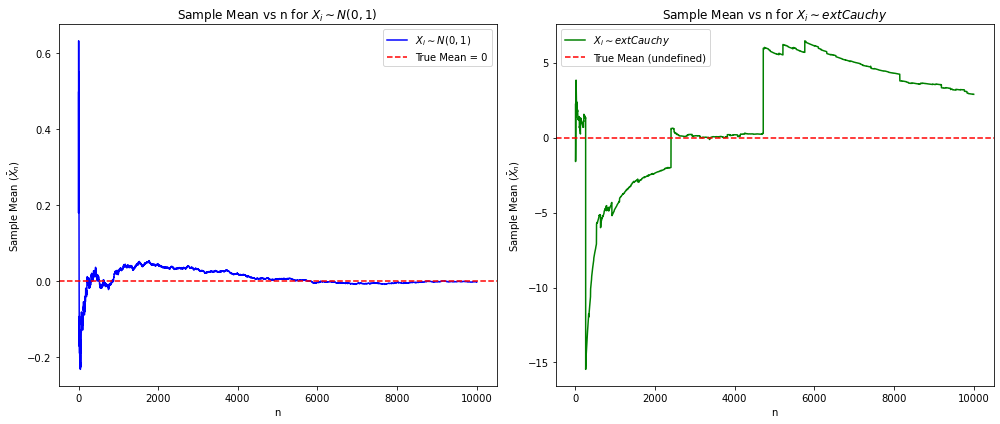


The difference between the two plots lies in the properties of the distributions:

1. For the Normal distribution (N(0,1)):
   - The mean and variance are well-defined.
   - By the Law of Large Numbers (LLN), the sample mean ar{X}_n$ converges to the true mean (0 in this case) as n increases.

2. For the Cauchy distribution:
   - The mean is undefined because the distribution has heavy tails, and its expected value does not exist.
   - As a result, the sample mean ar{X}_n$ does not converge to a stable value; it fluctuates wildly even as n increases.

This illustrates the importance of the underlying distribution's properties in determining the behavior of the sample mean.



In [3]:
import numpy as np
import matplotlib.pyplot as plt

n_max = 10000

# Generating N(0,1) random variables and calculating X_bar_n
np.random.seed(42) 
normal_data = np.random.normal(0, 1, n_max)
normal_means = np.cumsum(normal_data) / np.arange(1, n_max + 1)

# Generating Cauchy random variables and calculating X_bar_n
cauchy_data = np.random.standard_cauchy(n_max)
cauchy_means = np.cumsum(cauchy_data) / np.arange(1, n_max + 1)

plt.figure(figsize=(14, 6))

# Plot for Normal distribution
plt.subplot(1, 2, 1)
plt.plot(range(1, n_max + 1), normal_means, label='$X_i \sim N(0,1)$', color='blue')
plt.axhline(y=0, color='red', linestyle='--', label='True Mean = 0')
plt.title('Sample Mean vs n for $X_i \sim N(0,1)$')
plt.xlabel('n')
plt.ylabel('Sample Mean ($\\bar{X}_n$)')
plt.legend()

# Plot for Cauchy distribution
plt.subplot(1, 2, 2)
plt.plot(range(1, n_max + 1), cauchy_means, label='$X_i \sim \text{Cauchy}$', color='green')
plt.axhline(y=0, color='red', linestyle='--', label='True Mean (undefined)')
plt.title('Sample Mean vs n for $X_i \sim \text{Cauchy}$')
plt.xlabel('n')
plt.ylabel('Sample Mean ($\\bar{X}_n$)')
plt.legend()

plt.tight_layout()
plt.show()

# Explanation of the difference
explanation = """
The difference between the two plots lies in the properties of the distributions:

1. For the Normal distribution (N(0,1)):
   - The mean and variance are well-defined.
   - By the Law of Large Numbers (LLN), the sample mean $\bar{X}_n$ converges to the true mean (0 in this case) as n increases.

2. For the Cauchy distribution:
   - The mean is undefined because the distribution has heavy tails, and its expected value does not exist.
   - As a result, the sample mean $\bar{X}_n$ does not converge to a stable value; it fluctuates wildly even as n increases.

This illustrates the importance of the underlying distribution's properties in determining the behavior of the sample mean.
"""
print(explanation)


11. Let Y1, Y2, .... be independent random variables such that P(Yi=1)=P(Yi=-1)=1/2. Let Xn = /Sigma(Yi). Think of Yi as 'the stock price increased by one dollar', Yi=-1 'the stock price decreased by one dollar', and Xn as the value of the stock on day n. A. Find the E[Xn] and Var[Xn]. B. Simulate Xn and plot Xn versus n for n=1,2,..10000. Repeat the whole simulation several times. Notice two things. First, it is easy to 'see' patterns in the sequence even though it is random. Second, you will find that the 4 runs look very different even though they were generated the same way. How do the calculations in (a) explain the second observation?

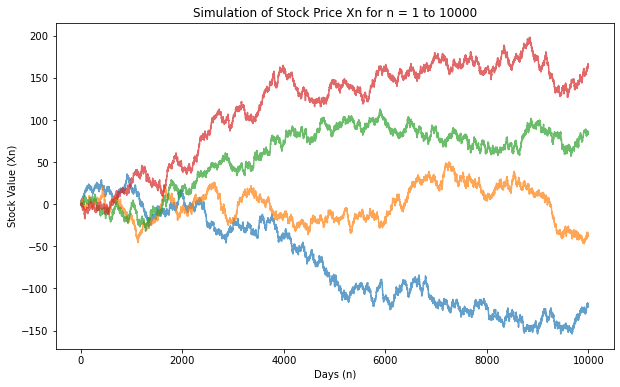

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_stock_price(n, runs=4):
    plt.figure(figsize=(10, 6))
    
    for _ in range(runs):
        # Generate independent random variables Yi, each being either 1 or -1
        Y = np.random.choice([-1, 1], size=n)
        # Compute the cumulative sum to get Xn
        X = np.cumsum(Y)
        plt.plot(np.arange(1, n+1), X, alpha=0.7)
    
    plt.xlabel('Days (n)')
    plt.ylabel('Stock Value (Xn)')
    plt.title(f'Simulation of Stock Price Xn for n = 1 to {n}')
    plt.show()
simulate_stock_price(10000, runs=4)



- $$ Y_1, Y_2, \ldots $$ are independent random variables.
- Each \( Y_i \) takes the value \( 1 \) or \( -1 \) with equal probability:
 $$
  P(Y_i = 1) = P(Y_i = -1) = \frac{1}{2}.
$$
- The stock value after \( n \) days is $$ X_n = \sum_{i=1}^n Y_i $$

$$
E[X_n] = E\left[\sum_{i=1}^n Y_i\right] = \sum_{i=1}^n E[Y_i].
$$

$$
E[Y_i] = 1 \cdot \frac{1}{2} + (-1) \cdot \frac{1}{2} = 0.
$$

$$
E[X_n] = \sum_{i=1}^n 0 = 0.
$$

$$
Var[X_n] = Var\left[\sum_{i=1}^n Y_i\right].
$$
Since the \( Y_i \)'s are independent, the variance of the sum is the sum of the variances:
$$
Var[X_n] = \sum_{i=1}^n Var[Y_i].
$$
$$
Var[Y_i] = E[Y_i^2] - (E[Y_i])^2.
$$
Since \( E[Y_i] = 0 \), we only need to compute \( E[Y_i^2] \). Since \( Y_i \) is either \( 1 \) or \( -1 \), we have:
$$
E[Y_i^2] = 1^2 \cdot \frac{1}{2} + (-1)^2 \cdot \frac{1}{2} = 1.
$$


- **Patterns in the Sequence**: The random walk may appear to exhibit "patterns" due to the inherent structure of random walks. However, these patterns are random and not deterministic. The values of \( X_n \) fluctuate up and down, sometimes appearing to follow certain "trends," but they are ultimately unpredictable.
  
- **Different Runs**: Each run looks different, even though they are generated using the same process. This is because the randomness in each \( Y_i \) leads to different sequences for each simulation. The fact that each run looks different reflects the randomness of the individual \( Y_i \)'s, even though their distributions (probabilities) are the same. 

### Connection to the Calculations in Part A

The calculations in part A explain this variability. Since \( E[X_n] = 0 \), the expected position of the stock after \( n \) days is always 0 (no drift), but the variance grows with \( n \). This means that the stock value will typically be within a range of \( \pm \sqrt{n} \) after \( n \) days, but the exact path it takes can vary significantly from one simulation to another.

The fact that each simulation has the same expected value (0) and variance (\( n \)) means that over many simulations, the paths will spread out more and more as \( n \) increases, but each individual path will be unpredictable. Hence, the observed differences between the runs are a direct consequence of the inherent randomness in each sequence of stock price changes.
